## Features Description

- **CRIM**: Per capita crime rate by town.  
- **ZN**: Proportion of residential land zoned for lots over 25,000 sq.ft.  
- **INDUS**: Proportion of non-retail business acres per town.  
- **CHAS**: Charles River dummy variable (1 if tract bounds river; 0 otherwise).  
- **NOX**: Nitric oxides concentration (parts per 10 million).  
- **RM**: Average number of rooms per dwelling.  
- **AGE**: Proportion of owner-occupied units built prior to 1940.  
- **DIS**: Weighted distances to five Boston employment centers.  
- **RAD**: Index of accessibility to radial highways.  
- **TAX**: Full-value property tax rate per $10,000.

- **PTRATIO**: Pupil-teacher ratio by town.  
- **B**: \(1000(Bk - 0.63)^2\) where Bk is the proportion of people of African American descent by town.  
- **LSTAT**: Percentage lower status of the population.  
- **MEDV**: Median value of owner-occupied homes in $1000s (the target variable for prediction).  


In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Input,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.simplefilter("ignore", RuntimeWarning)

# Understanding the Data

In [2]:
df=pd.read_csv("/kaggle/input/boston-housing-dataset/HousingData.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [3]:
df.shape

(506, 14)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,486.0,3.611874,8.720192,0.00632,0.081900,0.253715,3.560263,88.9762
ZN,486.0,11.211934,23.388876,0.00000,0.000000,0.000000,12.500000,100.0000
INDUS,486.0,11.083992,6.835896,0.46000,5.190000,9.690000,18.100000,27.7400
CHAS,486.0,0.069959,0.255340,0.00000,0.000000,0.000000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.538000,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.208500,6.623500,8.7800
AGE,486.0,68.518519,27.999513,2.90000,45.175000,76.800000,93.975000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.207450,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.000000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.000000,666.000000,711.0000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

## Handling Null Values

The dataset contains missing (null) values. To handle them, we have two main approaches:  

1. **Drop Rows**: Remove rows containing null values.  
2. **Impute Missing Values**: Replace null values with appropriate statistical measures:  
   - **Numerical Columns**: Use **mean** or **median** for replacement.  
   - **Categorical Columns**: Use **mode** (most frequent value) for replacement.  

Using these strategies ensures that the dataset remains clean and useful for analysis and modeling.


In [7]:
for col in df.columns:
    if df[col].dtype!='object':
        df[col]=df[col].fillna(df[col].median())
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
np.isinf(df).sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [10]:
numerical_cols   = df.select_dtypes(exclude=['object']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("No. of Numerical Columns:", len(numerical_cols))
print("No. of Categorical Columns:", len(categorical_cols))

No. of Numerical Columns: 14
No. of Categorical Columns: 0


In [11]:
col_name=[]
n_unique=[]
unique_values=[]
col_dtype=[]
for col in df.columns:
    col_name.append(col)
    col_dtype.append(df[col].dtype)
    unique_values.append(df[col].unique())
    n_unique.append(df[col].nunique())
check_dic={'Column':col_name,'Number of Unique Values':n_unique,'Unique Values':unique_values,'Data Type':col_dtype}
check_dic=pd.DataFrame(check_dic)
check_dic

,Column,Number of Unique Values,Unique Values,Data Type
0,CRIM,485,"[0.00632, 0.02731, 0.02729, 0.03237, 0.06905, ...",float64
1,ZN,26,"[18.0, 0.0, 12.5, 75.0, 21.0, 90.0, 85.0, 100....",float64
2,INDUS,76,"[2.31, 7.07, 2.18, 7.87, 8.14, 5.96, 9.69, 2.9...",float64
3,CHAS,2,"[0.0, 1.0]",float64
4,NOX,81,"[0.538, 0.469, 0.458, 0.524, 0.499, 0.428, 0.4...",float64
5,RM,446,"[6.575, 6.421, 7.185, 6.998, 7.147, 6.43, 6.01...",float64
6,AGE,349,"[65.2, 78.9, 61.1, 45.8, 54.2, 58.7, 66.6, 96....",float64
7,DIS,412,"[4.09, 4.9671, 6.0622, 5.5605, 5.9505, 6.0821,...",float64
8,RAD,9,"[1, 2, 3, 5, 4, 8, 6, 7, 24]",int64
9,TAX,66,"[296, 242, 222, 311, 307, 279, 252, 233, 243, ...",int64


# Data visualization

## Exploring Categorical Variables

In this dataset, we can consider both **CHAS** and **RAD** as categorical variables:  

- **CHAS**: A binary variable indicating whether the property is next to the Charles River (**1 = Yes, 0 = No**).  
- **RAD**: An index representing accessibility to radial highways, which can be treated as a categorical feature due to its discrete nature.  

Properly handling these categorical variables can improve model performance in predictive tasks.


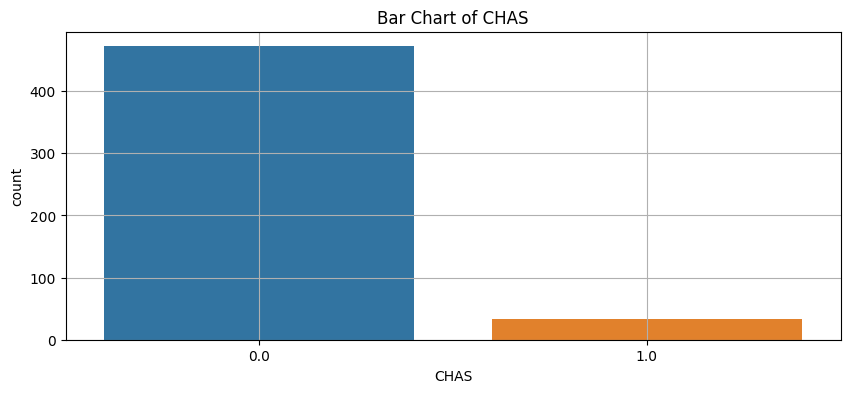

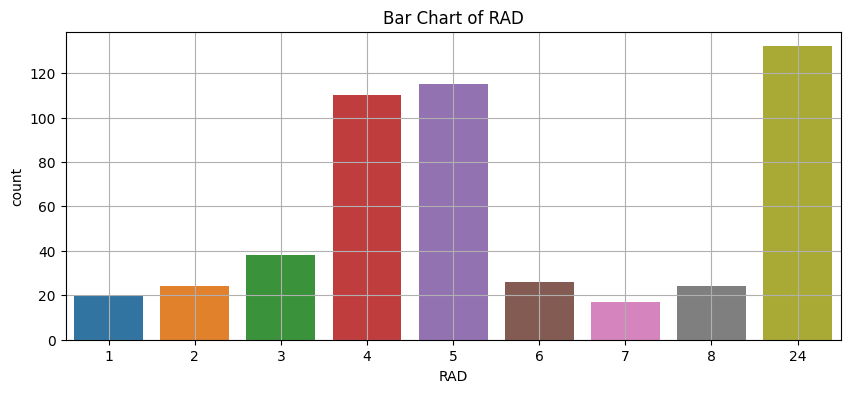

In [12]:
cols=['CHAS','RAD']
for col in cols:
    plt.figure(figsize=(10,4))
    sns.countplot(x=col,data=df)
    plt.title(f'Bar Chart of {col}')
    plt.grid(True)
    plt.show()

## Explore Numerical Variables

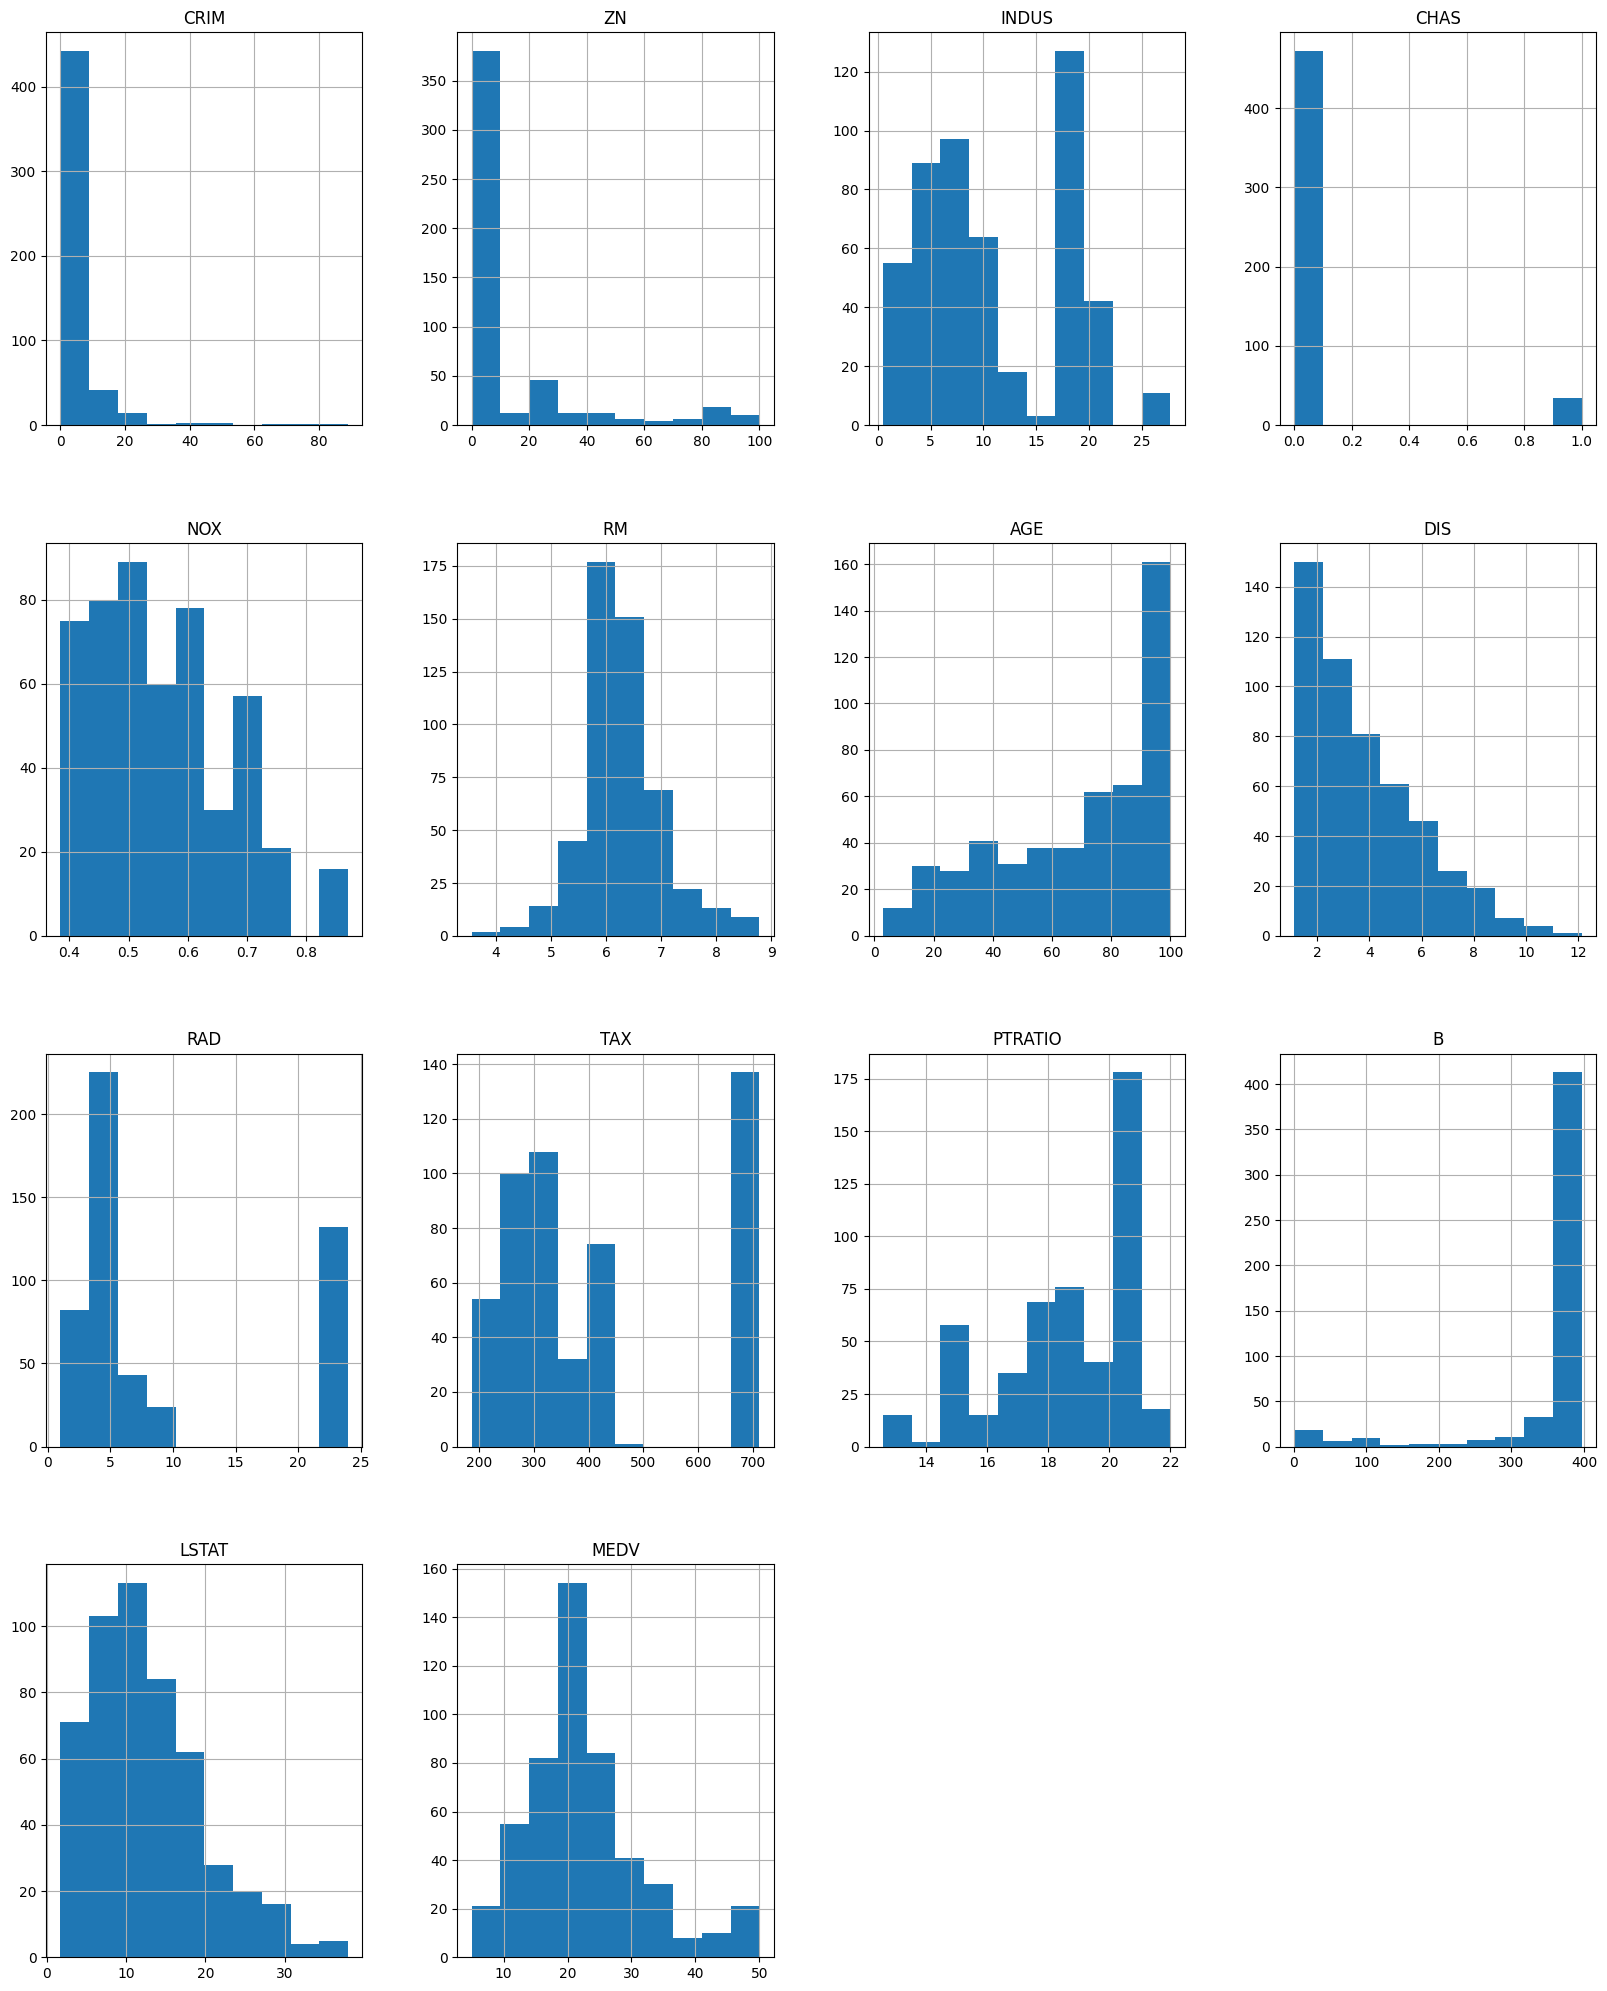

In [13]:
df.hist(figsize=(20,25))
plt.title('Histograms of features')
plt.show()

## Handling Skewed Data

The dataset exhibits some skewness, which can negatively impact model performance. To address this, we can apply various transformation techniques:  

### **Techniques to Handle Skewness**
- **Log Transformation**: Useful for right-skewed distributions (e.g., `np.log1p(column)`).  
- **Square Root Transformation**: Reduces skewness while preserving relationships.

Applying the appropriate transformation can help normalize the data and improve model performance.


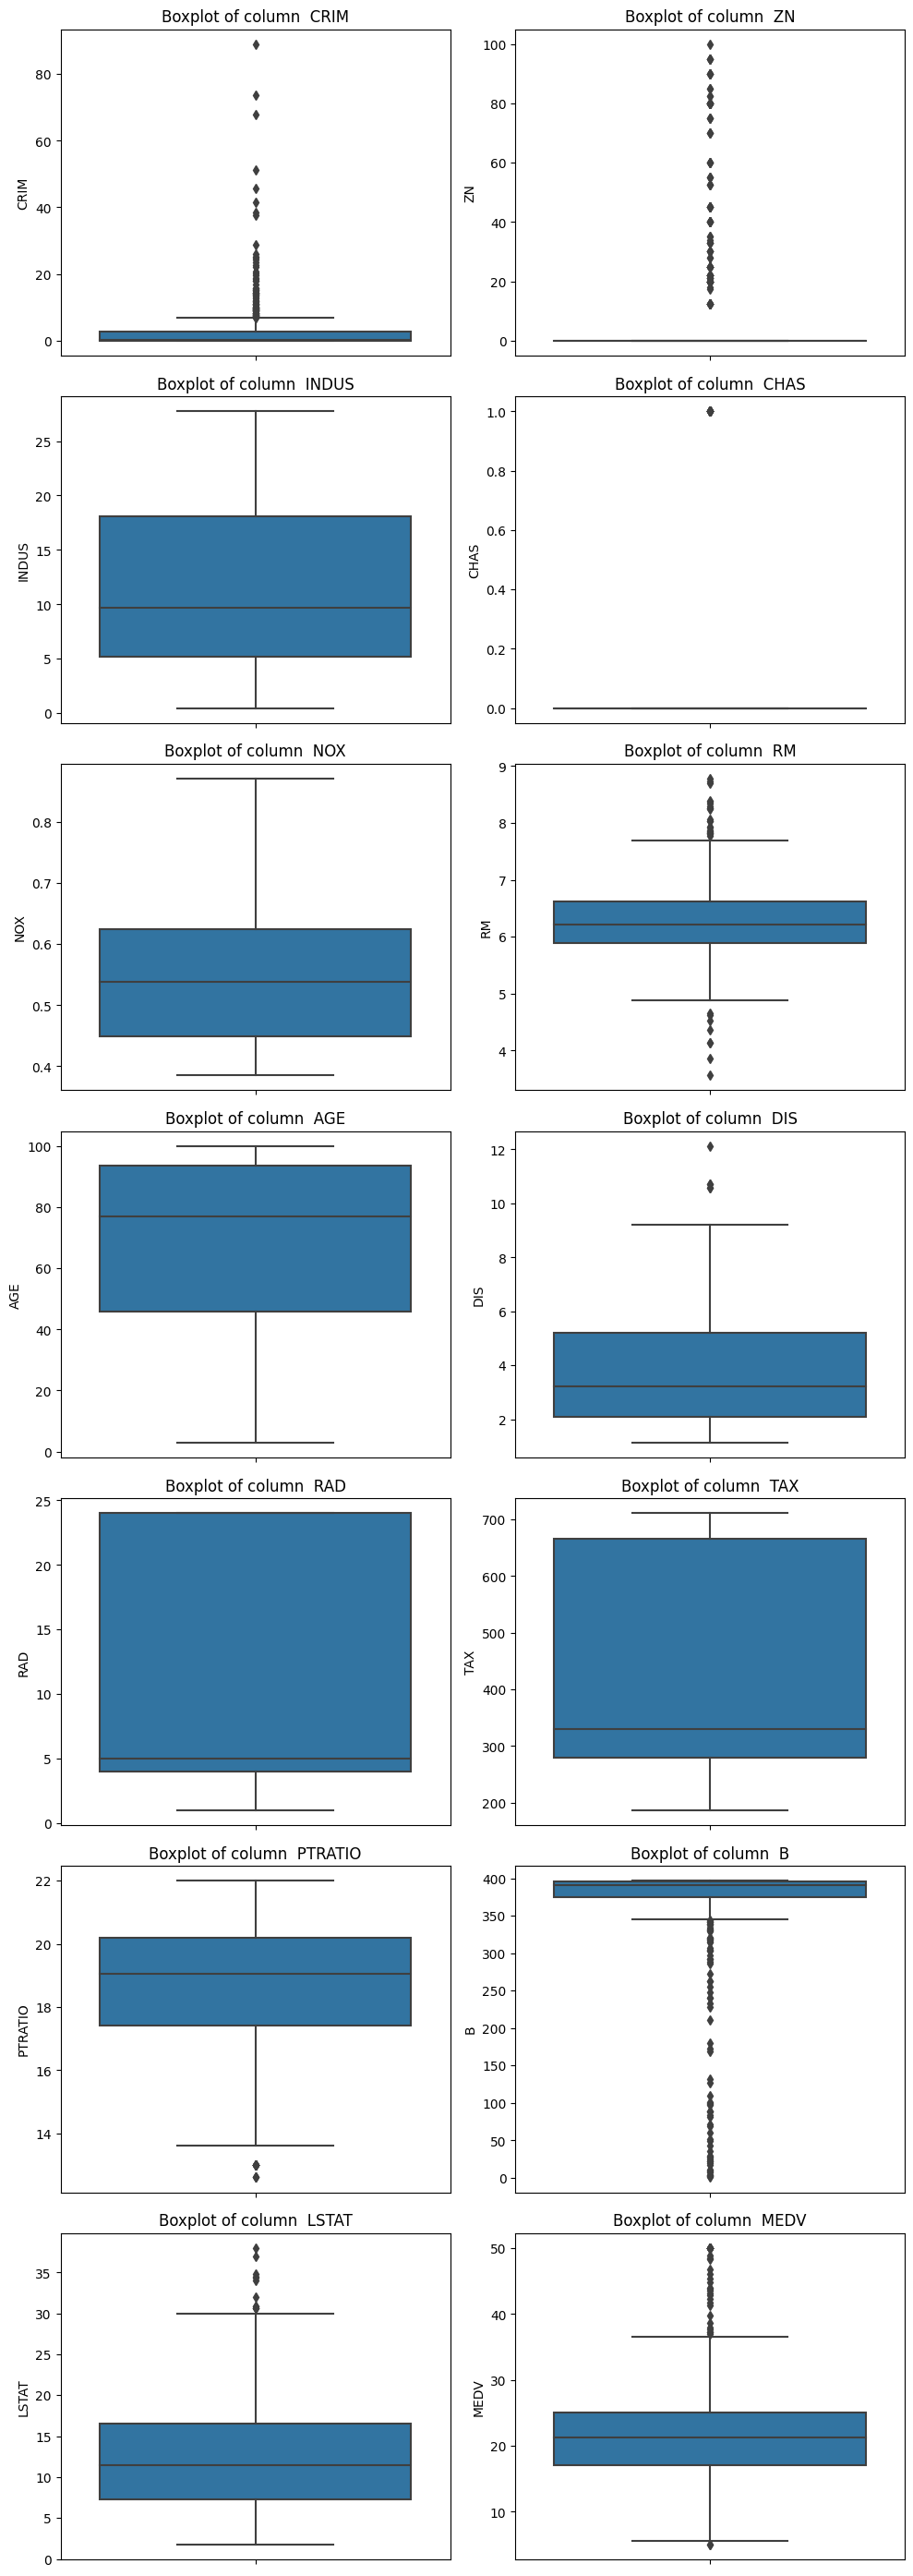

In [14]:
rows = len(numerical_cols) // 2 if len(numerical_cols) % 2 == 0 else (len(numerical_cols.columns) // 2) + 1

plt.figure(figsize=(10, rows * 4)) 

for i, col in enumerate(numerical_cols):  
    plt.subplot(rows, 2, i + 1)
    sns.boxplot(y=df[col])  
    plt.ylabel(col)
    plt.title(f"Boxplot of column  {col}")

plt.tight_layout()
plt.show()

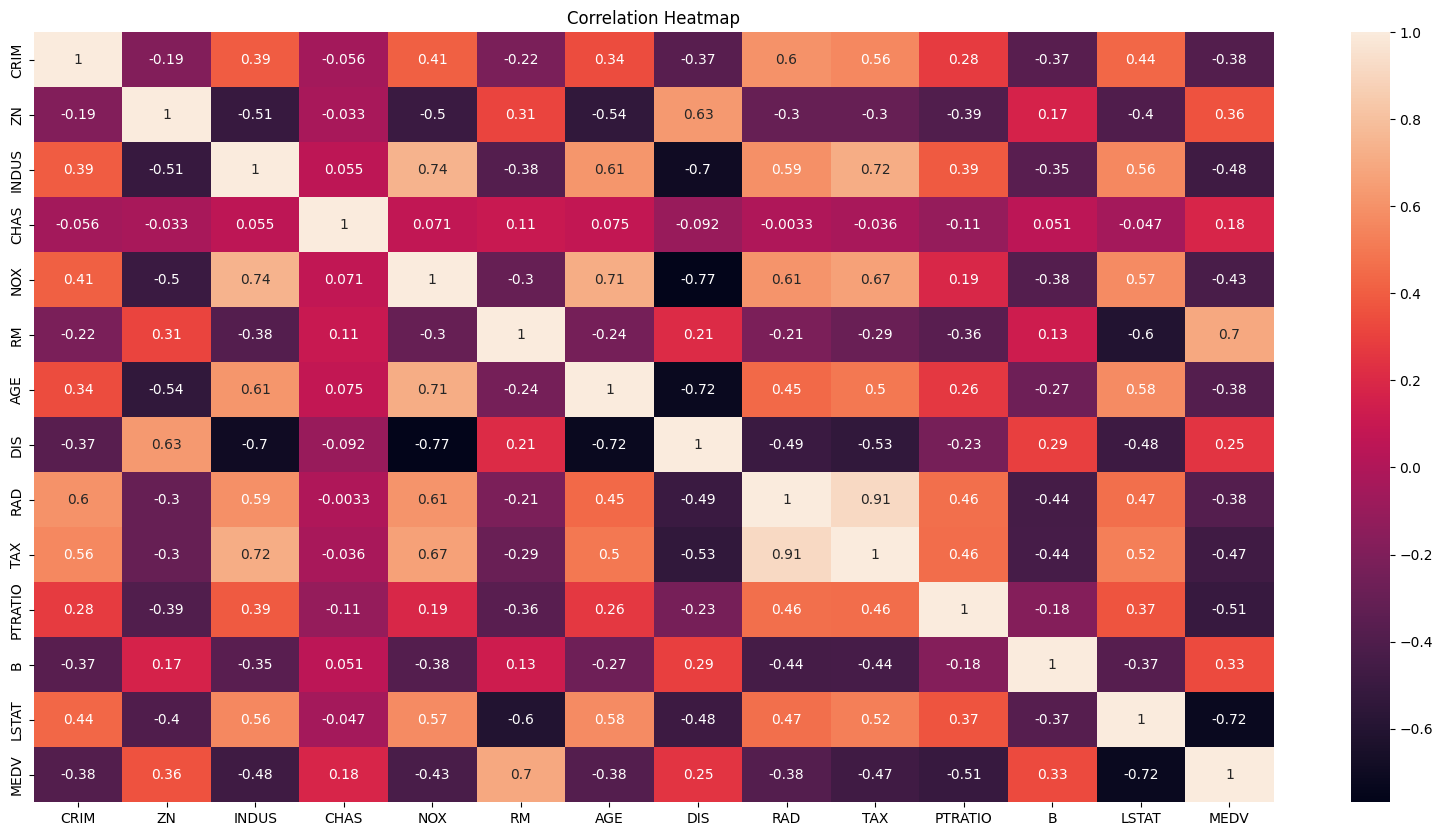

In [15]:
plt.figure(figsize=(20,10))
corr=df.corr()
sns.heatmap(corr,annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [16]:
corr.abs()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,0.185359,0.392632,0.055585,0.410971,0.220045,0.343427,0.366025,0.601224,0.560469,0.277964,0.365336,0.437417,0.383895
ZN,0.185359,1.000000,0.507304,0.032992,0.498619,0.312295,0.535341,0.632428,0.300061,0.304385,0.394622,0.170125,0.398838,0.362292
INDUS,0.392632,0.507304,1.000000,0.054693,0.738387,0.377978,0.614248,0.698621,0.592735,0.716267,0.385366,0.354840,0.564508,0.476394
CHAS,0.055585,0.032992,0.054693,1.000000,0.070867,0.106797,0.074984,0.092318,0.003339,0.035822,0.109451,0.050608,0.047279,0.183844
NOX,0.410971,0.498619,0.738387,0.070867,1.000000,0.302188,0.711864,0.769230,0.611441,0.668023,0.188933,0.380051,0.573040,0.427321
RM,0.220045,0.312295,0.377978,0.106797,0.302188,1.000000,0.239518,0.205246,0.209847,0.292048,0.355501,0.128069,0.604323,0.695360
AGE,0.343427,0.535341,0.614248,0.074984,0.711864,0.239518,1.000000,0.724354,0.447088,0.498408,0.261826,0.268029,0.575022,0.377572
DIS,0.366025,0.632428,0.698621,0.092318,0.769230,0.205246,0.724354,1.000000,0.494588,0.534432,0.232471,0.291512,0.483244,0.249929
RAD,0.601224,0.300061,0.592735,0.003339,0.611441,0.209847,0.447088,0.494588,1.000000,0.910228,0.464741,0.444413,0.467765,0.381626
TAX,0.560469,0.304385,0.716267,0.035822,0.668023,0.292048,0.498408,0.534432,0.910228,1.000000,0.460853,0.441808,0.524156,0.468536


# Detecting Outliers

In [17]:
Q1=df.iloc[:,:-1].quantile(.25)
Q3=df.iloc[:,:-1].quantile(.75)
IQR=Q3-Q1

outliers=((df.iloc[:, :-1] < (Q1 - 1.5 * IQR)) | (df.iloc[:, :-1] > (Q3 + 1.5 * IQR)))
df[outliers.any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,15.02340,0.0,18.10,0.0,0.614,5.304,97.3,2.1007,24,666,20.2,349.48,24.91,12.0
478,10.23300,0.0,18.10,0.0,0.614,6.185,96.7,2.1705,24,666,20.2,379.70,18.03,14.6
479,14.33370,0.0,18.10,0.0,0.614,6.229,88.0,1.9512,24,666,20.2,383.32,13.11,21.4
489,0.18337,0.0,27.74,0.0,0.609,5.414,98.3,1.7554,4,711,20.1,344.05,23.97,7.0


## Handling Outliers in the Boston Housing Dataset  

During our analysis, we discovered that **a significant portion of the dataset (~283 rows out of 506)** were identified as outliers using the **Interquartile Range (IQR) method**.  
Since removing such a large portion of data could lead to **data loss and reduced model performance**, we opted for a more robust approach.  

### **Our Approach to Handling Outliers:**  
1. **Log Transformation**:  
   - Many numerical features, such as `CRIM`, `LSTAT`, and `B`, exhibit **high skewness**.  
   - We apply a **log transformation** (`log(1 + x)`) to reduce the impact of extreme values.  

2. **Robust Scaling**:  
   - Instead of using standard normalization methods (like MinMax or StandardScaler), we apply **RobustScaler**, which scales data using the **median and IQR**.  
   - This makes our dataset **more stable** for machine learning models by reducing the influence of outliers.  

### **Why This Works?**  
✅ Preserves valuable data instead of removing outliers.  
✅ Makes the distribution more **normal-like**, improving model performance.  
✅ Reduces the impact of extreme values, ensuring robust feature scaling.  


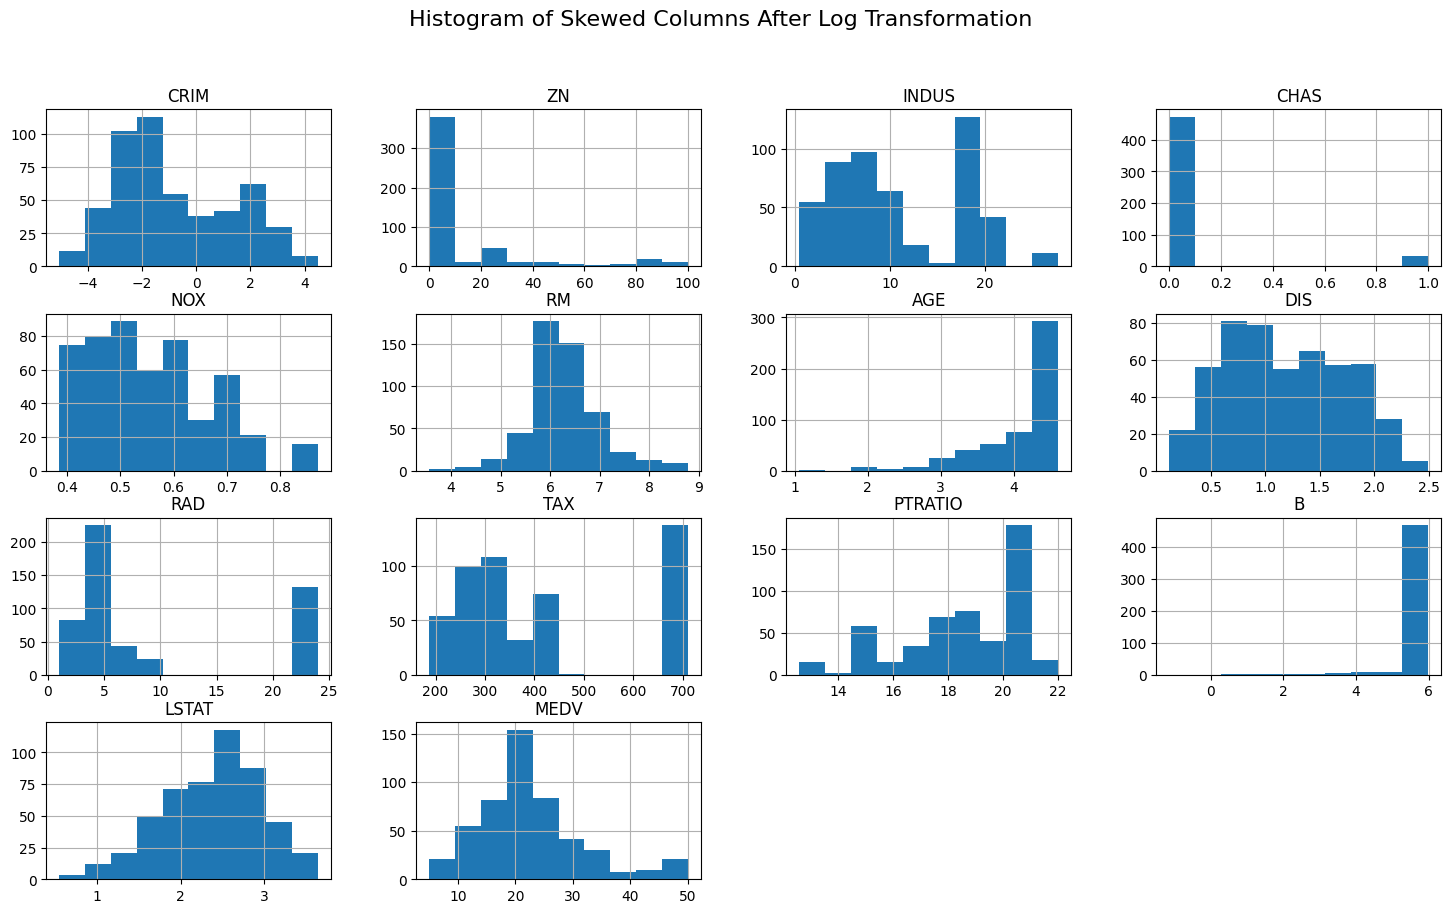

In [18]:
# Define skewed columns
skewed_cols = ["AGE", "DIS", "CRIM", "LSTAT", "B"]

# Apply log1p transformation for better stability
for col in skewed_cols:
    df[col] = np.log(df[col]+1e-10)   

# Plot histograms after log transformation
df.hist(figsize=(18, 10))
plt.suptitle("Histogram of Skewed Columns After Log Transformation", fontsize=16)
plt.show()

In [19]:
df.isna().sum(),np.isinf(df).sum()

(CRIM       0
 ZN         0
 INDUS      0
 CHAS       0
 NOX        0
 RM         0
 AGE        0
 DIS        0
 RAD        0
 TAX        0
 PTRATIO    0
 B          0
 LSTAT      0
 MEDV       0
 dtype: int64,
 CRIM       0
 ZN         0
 INDUS      0
 CHAS       0
 NOX        0
 RM         0
 AGE        0
 DIS        0
 RAD        0
 TAX        0
 PTRATIO    0
 B          0
 LSTAT      0
 MEDV       0
 dtype: int64)

In [20]:
numerical_cols = [col for col in df.columns if col not in ['CHAS', 'RAD','MEDV']]
categorical_cols = ['CHAS', 'RAD']


We apply **multiple sequential transformations** (such as imputation, log transformation, and scaling) to numerical features. A `Pipeline` is ideal for this because it ensures that each step is executed **in order**, preventing data leakage and maintaining consistency.  

For categorical features, we apply **different transformations to different categorical columns** (e.g., One-Hot Encoding for `CHAS` and Ordinal Encoding for `RAD`). To handle this efficiently, we use a `ColumnTransformer`, which allows us to apply **specific transformations to specific groups of columns** within a single step.

In [21]:
# Numerical pipeline
numerical_pipline = Pipeline([
    ("imputer",SimpleImputer(strategy="median")),
    ("scaler",RobustScaler())
])

# Categorical pipeline
categorical_pipeline = ColumnTransformer([
    ("chas",OneHotEncoder(handle_unknown="ignore",drop='first'),['CHAS']),
    ('rad',OrdinalEncoder(),['RAD'])
])

# Combine both pipelines
preprocessor = ColumnTransformer([
    ("cat",categorical_pipeline,categorical_cols),
    ("num",numerical_pipline,numerical_cols)
])

In [22]:
# Spliting target variable and independent variables
X=df.drop(['MEDV'],axis=1)
y=df["MEDV"]
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
feature_names = X_train.columns
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [24]:
# Initialize results dictionary for regression
results = {
    "Model": [],
    "MSE": [],
    "RMSE": [],
    "MAE": [],
    "R2 Score": [],
    "CV R2 Score": []
}

# Function to append regression results
def append_results_regression(model_name, mse, rmse, mae, r2, cv_r2):
    results["Model"].append(model_name)
    results["MSE"].append(mse)
    results["RMSE"].append(rmse)
    results["MAE"].append(mae)
    results["R2 Score"].append(r2)
    results["CV R2 Score"].append(cv_r2)

In [25]:
def model_evaluation_regression(y_pred, y_test, model, X_train, y_train):
    # Compute evaluation metrics for regression
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Check if model is an sklearn model (i.e., has get_params())
    if hasattr(model, "get_params"):  
        cross_score = cross_val_score(model, X_train, y_train, cv=5, scoring='r2').mean()
    else:
        cross_score = None  # Cross-validation is not applicable for neural networks
    
    # Print evaluation metrics
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R2 Score: {r2:.4f}")

    # Only print if cross-score is available
    if cross_score is not None:
        print(f"Cross-Validation R2 Score: {cross_score:.4f}")
    
    # Optionally, display predictions and actual values side-by-side
    display(pd.DataFrame(np.c_[y_pred, y_test], columns=["Prediction", "Actual"]))
    
    # Return the metrics
    return mse, rmse, mae, r2, cross_score

In [26]:
def plot_regression_results(y_test, y_pred):

    # Compute residuals
    residuals = y_test - y_pred

    # Set up the figure with 3 subplots
    plt.figure(figsize=(10, 15))
    
    # True vs. Predicted values plot
    plt.subplot(3, 1, 1)
    plt.scatter(y_test, y_pred, alpha=0.7, edgecolor="k")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.title("True vs. Predicted Values")
    
    # Residuals vs. Predicted values plot
    plt.subplot(3, 1, 2)
    plt.scatter(y_pred, residuals, alpha=0.7, edgecolor="k")
    plt.axhline(0, color="r", linestyle="--")
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title("Residuals vs. Predicted Values")
    
    # Histogram (and KDE) of residuals
    plt.subplot(3, 1, 3)
    sns.histplot(residuals, kde=True, color="b", bins=20)
    plt.xlabel("Residuals")
    plt.title("Distribution of Residuals")
    
    plt.tight_layout()
    plt.show()


# Models We Will Apply:

1. **Linear Regression**  
   A simple and interpretable model that assumes a linear relationship between features and the target variable.

2. **Random Forest Regressor**  
   An ensemble learning method that builds multiple decision trees and averages their predictions to improve accuracy and reduce overfitting.

3. **XGBoost Regressor**  
   An optimized gradient boosting algorithm that is known for high performance and efficiency in structured data.

4. **SVM Regressor**  
   Uses Support Vector Machines for regression, aiming to find the best-fit hyperplane within a certain margin of error.

5. **Deep Learning Neural Network**  
   A multi-layer perceptron (MLP) model that learns complex patterns through neural network architectures.

6. **Ensemble Learning**  
   A combination of multiple models to enhance predictive performance by leveraging the strengths of each approach.


## Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)
coeffcients =pd.DataFrame([X.columns,lr.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,CRIM,3.207205
1,ZN,0.372077
2,INDUS,-0.355229
3,CHAS,-0.023465
4,NOX,-1.147818
5,RM,-3.263811
6,AGE,2.81449
7,DIS,-0.14611
8,RAD,-6.154868
9,TAX,-2.58969


MSE: 19.5232
RMSE: 4.4185
MAE: 2.8707
R2 Score: 0.7338
Cross-Validation R2 Score: 0.7542


,Prediction,Actual
0,28.625111,23.6
1,38.510741,32.4
2,14.721600,13.6
3,26.585721,22.8
4,15.372719,16.1
...,...,...
97,5.519544,17.9
98,13.226647,9.6
99,17.312473,17.2
100,21.019719,22.5


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


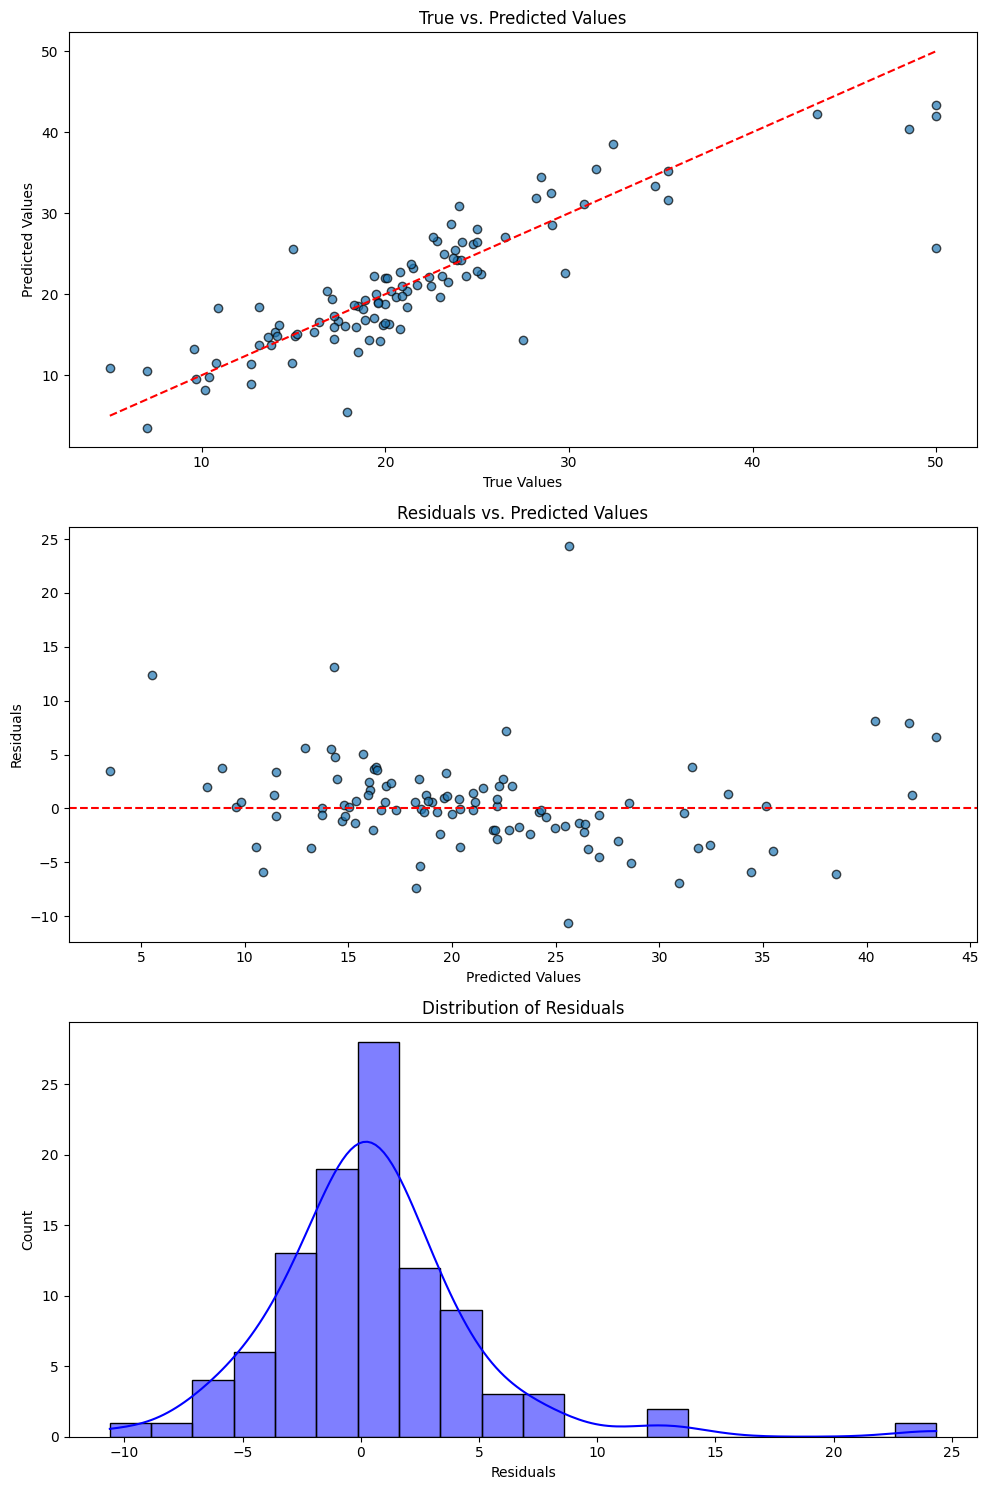

In [28]:
lr_mse, lr_rmse, lr_mae, lr_r2, lr_cross_score=model_evaluation_regression(y_pred_lr, y_test, lr, X_train, y_train)
append_results_regression('Linear Regression', lr_mse, lr_rmse, lr_mae, lr_r2, lr_cross_score)
plot_regression_results(y_test, y_pred_lr)

# Random Forest Regressor

In [29]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


importance  = rf.feature_importances_
importance_df=pd.DataFrame({'Column':feature_names,'Importance':importance})
importance_df=importance_df.sort_values(by='Importance',ascending =False)
importance_df

,Column,Importance
6,AGE,0.567873
12,LSTAT,0.236092
8,RAD,0.053123
2,INDUS,0.043975
5,RM,0.018925
10,PTRATIO,0.018703
9,TAX,0.018523
7,DIS,0.013221
11,B,0.011920
4,NOX,0.008576


MSE: 8.0319
RMSE: 2.8341
MAE: 2.0649
R2 Score: 0.8905
Cross-Validation R2 Score: 0.8058


,Prediction,Actual
0,23.217,23.6
1,32.125,32.4
2,16.966,13.6
3,23.490,22.8
4,16.923,16.1
...,...,...
97,11.798,17.9
98,12.484,9.6
99,12.665,17.2
100,20.450,22.5


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


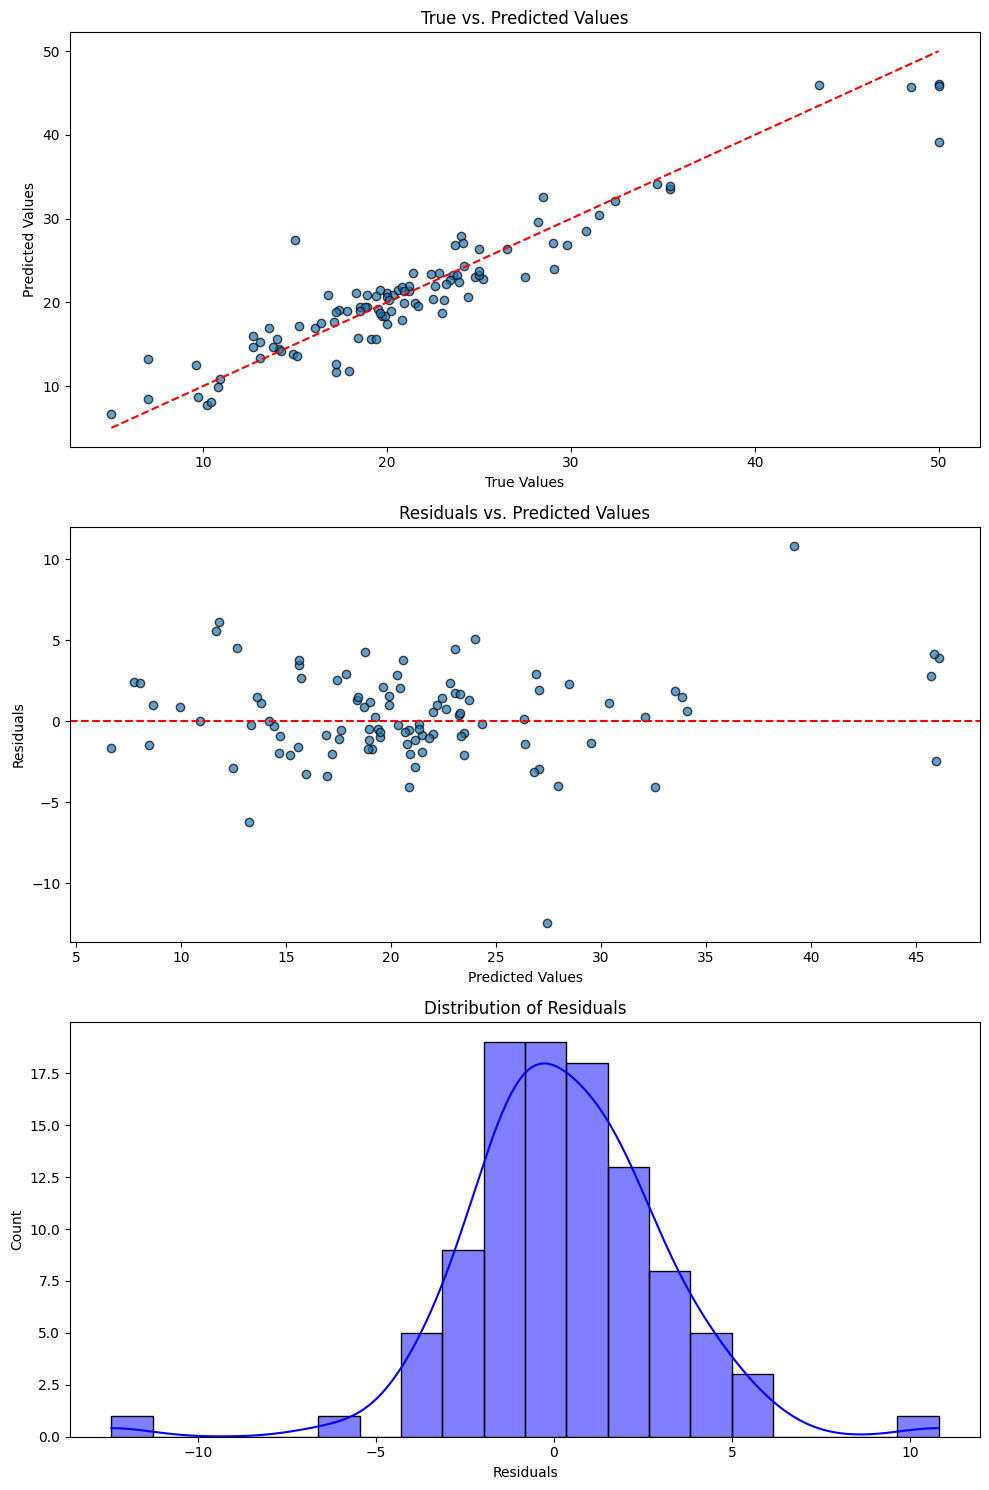

In [30]:
rf_mse, rf_rmse, rf_mae, rf_r2, rf_cross_score=model_evaluation_regression(y_pred_rf, y_test, rf, X_train, y_train)
append_results_regression('Random Forest Regressor', rf_mse, rf_rmse, rf_mae, rf_r2, rf_cross_score)
plot_regression_results(y_test, y_pred_rf)

## XGBRegressor

In [31]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

importance  = xgb.feature_importances_
importance_df=pd.DataFrame({'Column':feature_names,'Importance':importance})
importance_df=importance_df.sort_values(by='Importance',ascending =False)
importance_df

,Column,Importance
6,AGE,0.443849
12,LSTAT,0.256032
8,RAD,0.055669
10,PTRATIO,0.052194
9,TAX,0.048164
5,RM,0.037503
2,INDUS,0.034509
1,ZN,0.034489
7,DIS,0.010760
11,B,0.010262


MSE: 5.4439
RMSE: 2.3332
MAE: 1.8455
R2 Score: 0.9258
Cross-Validation R2 Score: 0.7833


,Prediction,Actual
0,23.140406,23.6
1,30.275272,32.4
2,16.842014,13.6
3,23.476109,22.8
4,15.115658,16.1
...,...,...
97,13.837663,17.9
98,12.431792,9.6
99,14.073845,17.2
100,21.252192,22.5


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


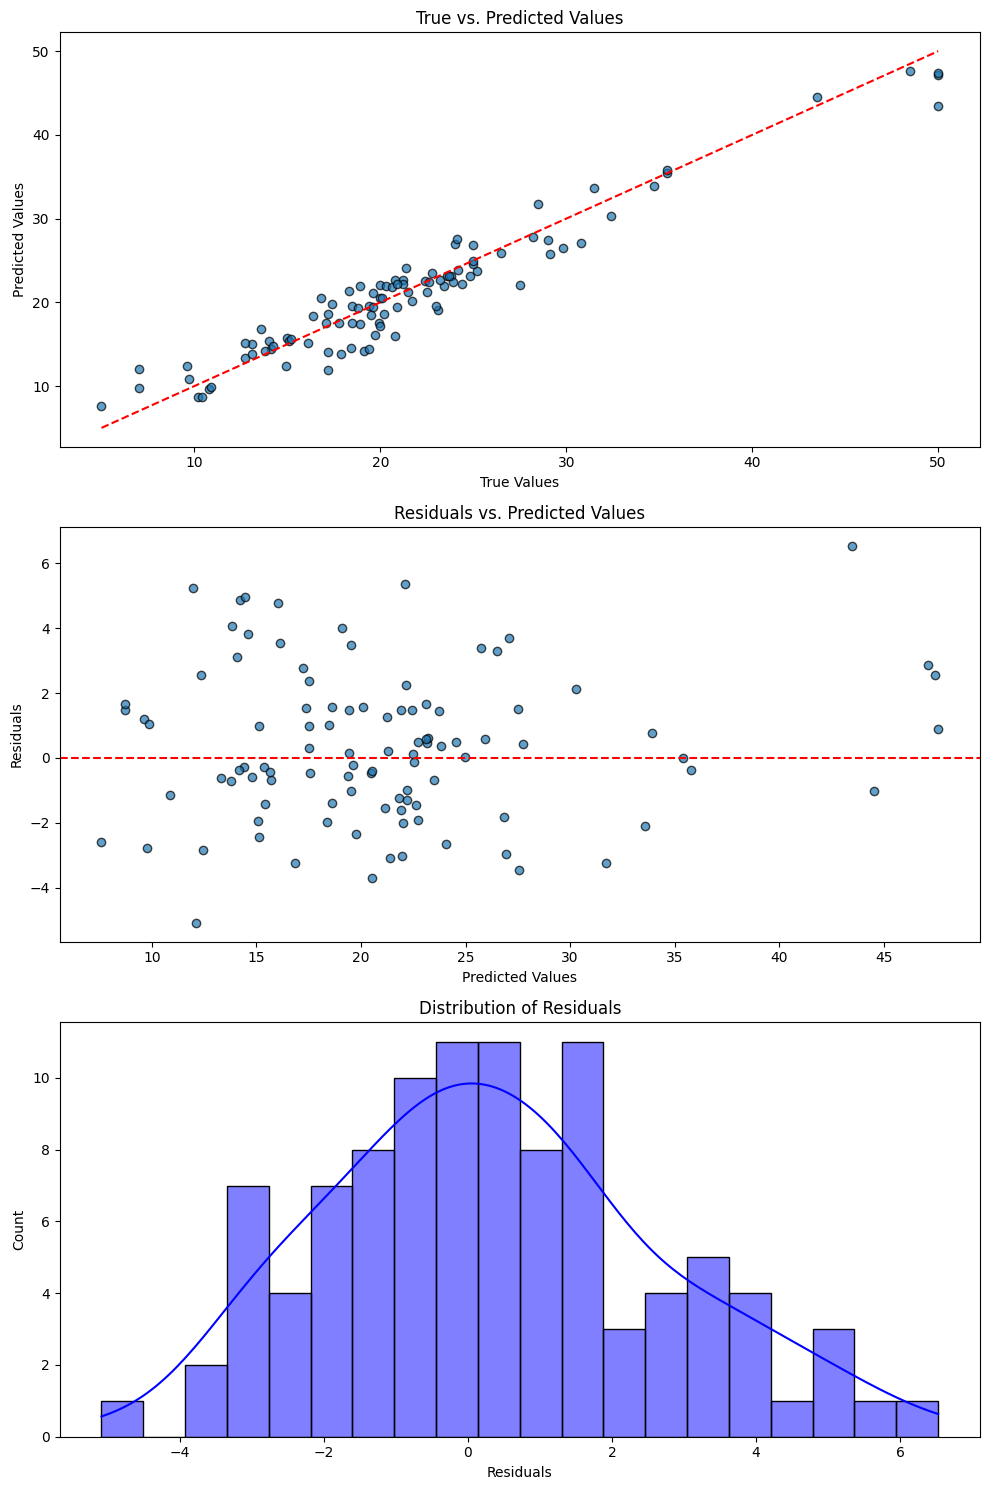

In [32]:
xgb_mse, xgb_rmse, xgb_mae, xgb_r2, xgb_cross_score=model_evaluation_regression(y_pred_xgb, y_test, xgb, X_train, y_train)
append_results_regression('XGBRegressor', xgb_mse, xgb_rmse, xgb_mae, xgb_r2, xgb_cross_score)
plot_regression_results(y_test, y_pred_xgb)

## SVM Regressor

In [33]:
from sklearn import svm
svm = svm.SVR()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

MSE: 44.2146
RMSE: 6.6494
MAE: 4.2348
R2 Score: 0.3971
Cross-Validation R2 Score: 0.3070


,Prediction,Actual
0,22.262727,23.6
1,25.694925,32.4
2,19.495842,13.6
3,23.509697,22.8
4,18.893921,16.1
...,...,...
97,11.089709,17.9
98,10.958721,9.6
99,11.374416,17.2
100,21.826193,22.5


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


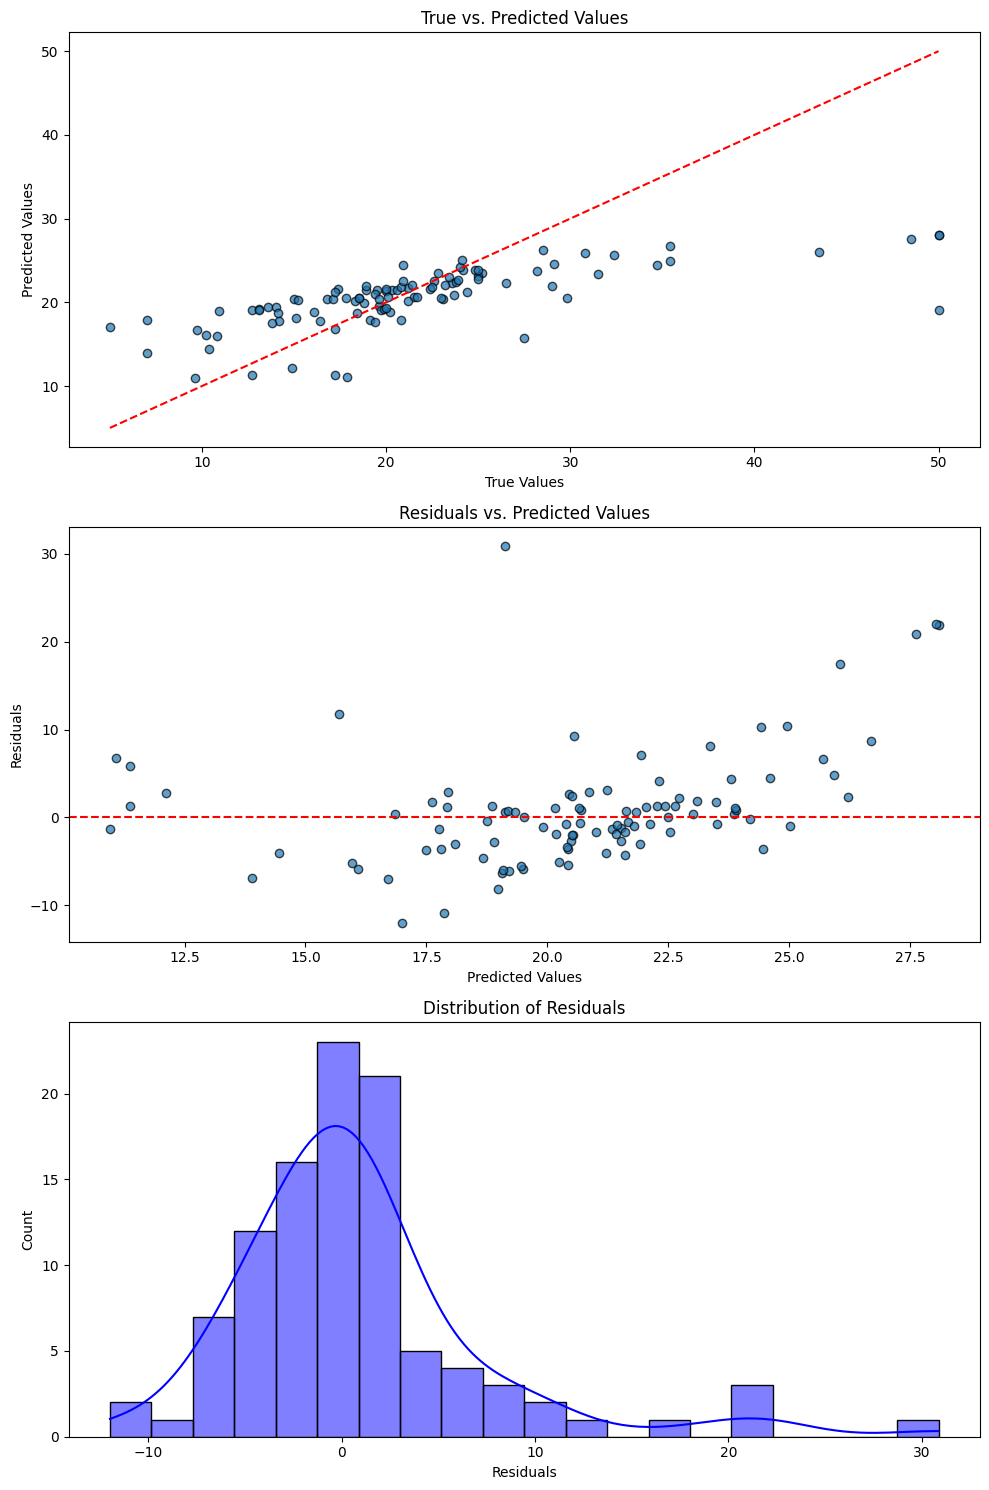

In [34]:
svm_mse, svm_rmse, svm_mae, svm_r2, svm_cross_score=model_evaluation_regression(y_pred_svm, y_test, svm, X_train, y_train)
append_results_regression('SVM Regressor', svm_mse, svm_rmse, svm_mae, svm_r2, svm_cross_score)
plot_regression_results(y_test, y_pred_svm)

# Deep Learning Neural Network

In [35]:
nn = Sequential([
    Input(shape=(X_train.shape[1],)),   
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(32, activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    Dense(16, activation='relu'),
    Dense(1)   
])

nn.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
nn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,569 (53.00 KB)

 Trainable params: 13,121 (51.25 KB)

 Non-trainable params: 448 (1.75 KB)

In [36]:
# Set up early stopping to prevent overfitting
# early_stop=EarlyStopping(monitor='val_loss',patience=50, restore_best_weights=True)
history = nn.fit(X_train, y_train,
                       epochs=500,
                       batch_size=32,
                       validation_split=0.2)

Epoch 1/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 589.9905 - mse: 589.9905 - val_loss: 552.8924 - val_mse: 552.8924
Epoch 2/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 542.0172 - mse: 542.0172 - val_loss: 536.7161 - val_mse: 536.7161
Epoch 3/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 528.2679 - mse: 528.2679 - val_loss: 520.3200 - val_mse: 520.3200
Epoch 4/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 482.9035 - mse: 482.9035 - val_loss: 502.2315 - val_mse: 502.2315
Epoch 5/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 478.7553 - mse: 478.7553 - val_loss: 481.6987 - val_mse: 481.6987
Epoch 6/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 406.8358 - mse: 406.8358 - val_loss: 459.5399 - val_mse: 459.5399
Epoch 7/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 374.9076 - mse: 374.9076 - val_loss: 437.5581 - val_mse: 437.5581
Epoch 8/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 367.2171 - mse: 367.2171 - val_loss: 412.3728 - val_mse: 412.3728

In [37]:
y_pred_nn=nn.predict(X_test)
print(y_pred_nn.shape)
y_pred_nn = y_pred_nn.flatten()
print(y_pred_nn.shape)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
(102, 1)
(102,)


MSE: 14.3771
RMSE: 3.7917
MAE: 2.4307
R2 Score: 0.8039


,Prediction,Actual
0,24.264261,23.6
1,33.033604,32.4
2,17.175270,13.6
3,22.026632,22.8
4,17.215166,16.1
...,...,...
97,9.754800,17.9
98,10.440948,9.6
99,11.016916,17.2
100,24.686277,22.5


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


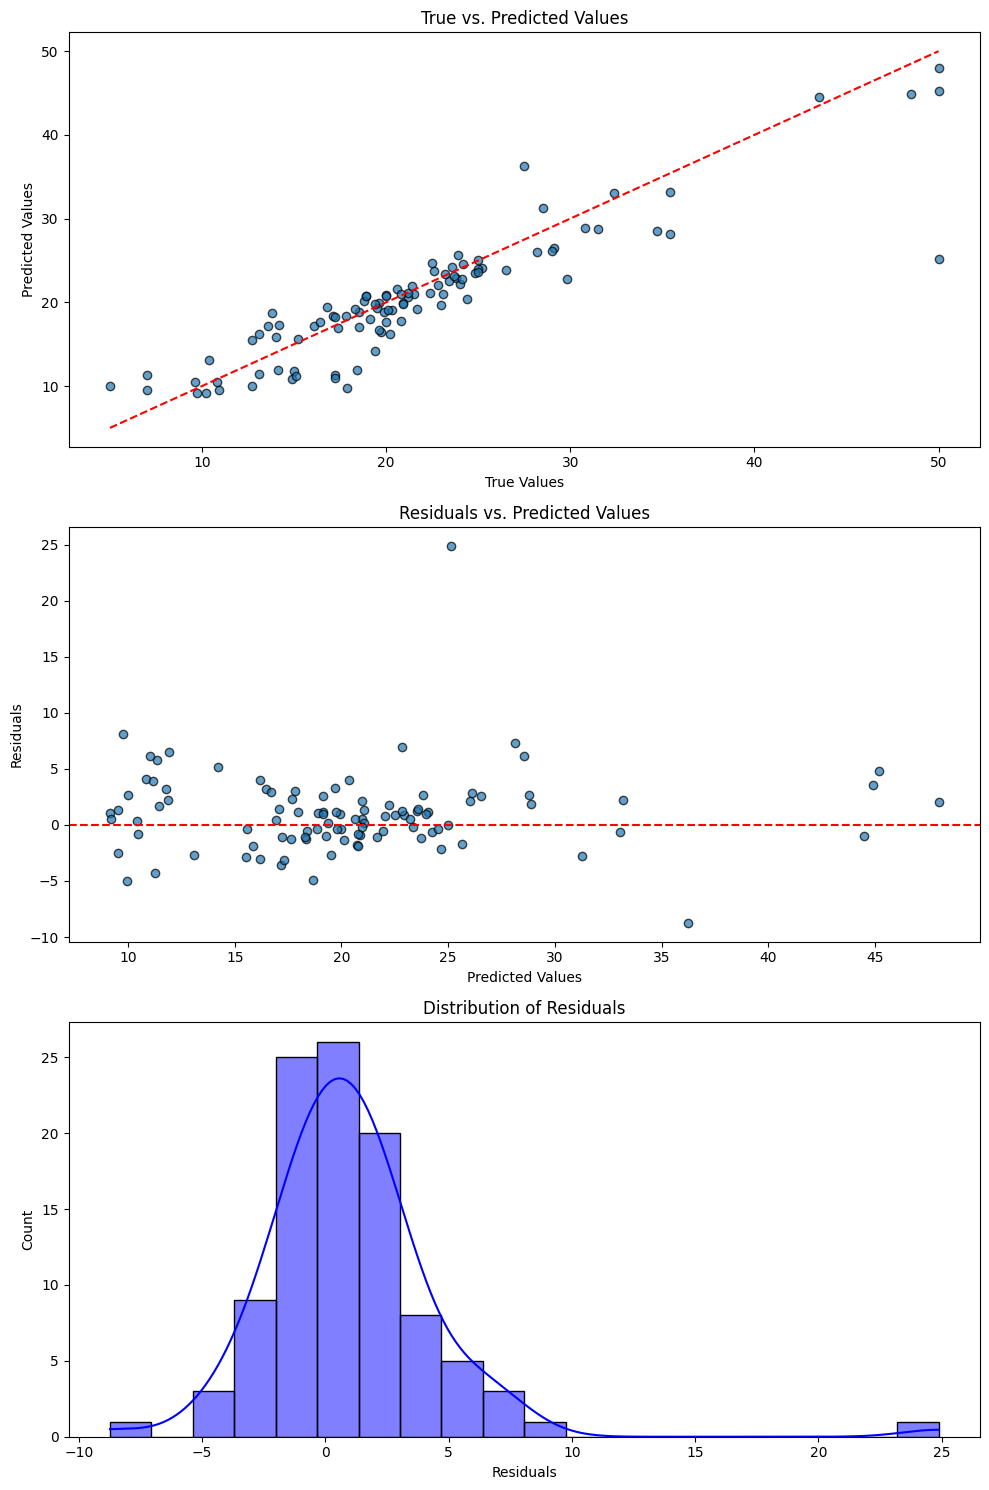

In [38]:
nn_mse, nn_rmse, nn_mae, nn_r2, nn_cross_score = model_evaluation_regression(y_pred_nn, y_test, nn, X_train, y_train)
append_results_regression('Neural Network', nn_mse, nn_rmse, nn_mae, nn_r2, nn_cross_score)
plot_regression_results(y_test, y_pred_nn)

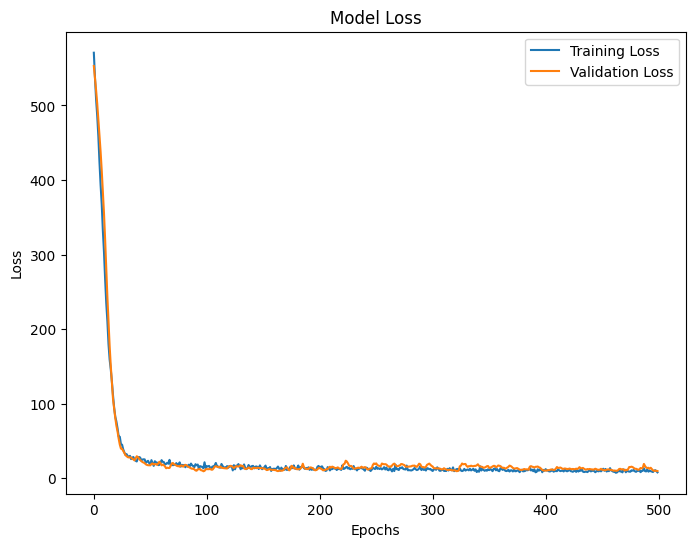

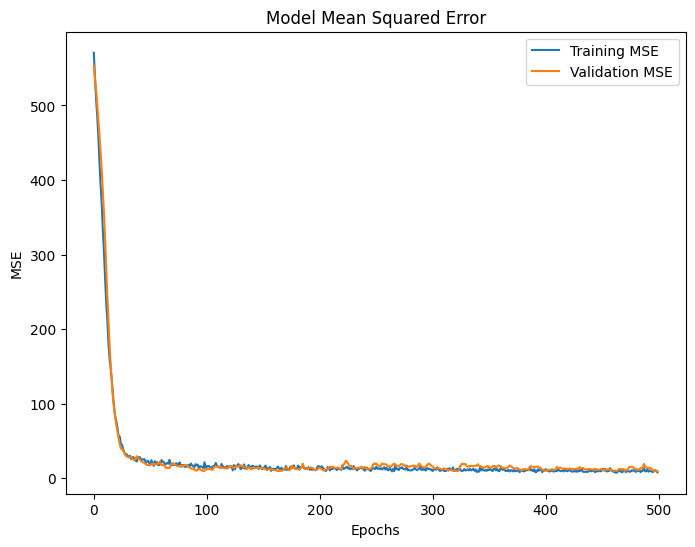

In [39]:
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Visualization: Plotting training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.title('Model Mean Squared Error')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [40]:
pd.DataFrame(results).sort_values(by='R2 Score',ascending=False)

,Model,MSE,RMSE,MAE,R2 Score,CV R2 Score
2,XGBRegressor,5.443858,2.333208,1.845514,0.925766,0.783304
1,Random Forest Regressor,8.031878,2.834057,2.064941,0.890475,0.805779
4,Neural Network,14.377132,3.791719,2.430720,0.803949,NaN
0,Linear Regression,19.523220,4.418509,2.870681,0.733776,0.754165
3,SVM Regressor,44.214638,6.649409,4.234828,0.397077,0.306961
